True


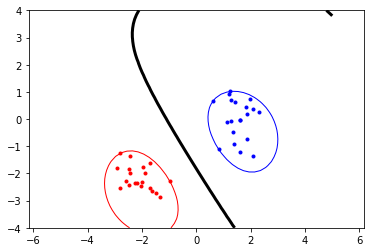

In [19]:
import numpy as np
import random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### There are three kernel functions to be selected. 
### Note：the kernel function can be selected by anntated the following two of the three"return" phrase
def kernel(x, y,p=5,sigma=2): 
    #return np.dot(x, y)  #linear kernel
    #return (np.dot(x, y)+1)**p  # poly kernel
     return np.exp(-np.sum(np.power(np.array(x)-np.array(y), 2))/(2*sigma**2))  # RBF kernel


def pre_compute_matrix_values(): # the function is used to calcutate matrix P
    P = np.zeros((len(inputs),len(inputs)))
    for i in range(len(inputs)):
        for j in range(len(inputs)):
            P[i,j] = targets[i] * targets[j] * kernel(inputs[i], inputs[j])
    return P

def objective(alpha_vector): # the function to be minimized, and P is the pre_computed matrix
    first_part = second_part = 0
    Q = np.zeros((len(inputs),len(inputs)))
    for i in range(len(inputs)):
        for j in range(len(inputs)):
            Q[i,j]= alpha_vector[i] * alpha_vector[j] * P[i,j]
    return 0.5 * np.sum(Q) - np.sum(alpha_vector)

def zerofun(alpha_vector): # the function is used to be a constrain
    return np.dot(alpha_vector, targets)

def extract_non_zero_alpha(final_alpha_vector, threshold):
    final_list = [] # every element in the form of (x_val, y_val, alpha, target)
    for i in range(len(inputs)):
        if final_alpha_vector[i] > threshold:
            row = [inputs[i,0], inputs[i,1], final_alpha_vector[i], targets[i]]
            final_list.append(row)
    return np.array(final_list)

def calculate_b(support_vector_data): # support_vector_data = [x_val, y_val, alpha, target], b can be calculated using any support vector
    b_zero = 0
    for i in range(len(inputs)):
        b_zero += final_alpha_vector[i] * targets[i] * kernel([support_vector_data[0], support_vector_data[1]], inputs[i])
    return b_zero - support_vector_data[3]

def indicator(new_data):
    ind = 0
    for i in range(len(non_zero_alpha_data)):
        non_zero_alpha_xy_vals = [non_zero_alpha_data[i,0], non_zero_alpha_data[i,1]]
        ind += non_zero_alpha_data[i][2] * non_zero_alpha_data[i][3] * kernel(non_zero_alpha_xy_vals, new_data)
    return ind - b



########################################## MAIN PROGRAM ##########################################

### samples are produced in this part###
np.random.seed(100)
d = 0.5
classA = np.concatenate((np.random.randn(10,2) * d + [1.5,0.5],np.random.randn(10,2) * d + [1.5,-0.5]))
classB = np.random.randn(20, 2) * d + [ -2, -2]  #  A and B can be used to show linear kernel
inputs = np.concatenate((classA, classB ))
targets = np.concatenate((np.ones(classA.shape[0]),-np.ones(classB.shape[0])))
### 

# np.random.seed(100)
# d = 0.5
# classA = np.concatenate((np.random.randn(10,2) * d + [1.5,0.5],np.random.randn(10,2) * d + [-4,-4]))
# classB = np.random.randn(20, 2) * d + [ -2, -2]  #  A and B can be used to show RBF kernel and poly kernel
# inputs = np.concatenate((classA, classB ))
# targets = np.concatenate((np.ones(classA.shape[0]),-np.ones(classB.shape[0])))
# ### 


# apply slack
C = 1000
B = [(0, C) for b in range(len(inputs))] # upper and lower bounds for slack
# B = [(0, None) for b in range(len(inputs))]  # Only have a lower bound

XC = {'type': 'eq', 'fun': zerofun} # constrainst for the second half of the equation (10)

# apply the minimize function
P = pre_compute_matrix_values()
start = np.zeros(len(inputs))
ret_val = minimize(objective, start, bounds=B, constraints=XC)
final_alpha_vector = ret_val['x'] 
status = ret_val['success']  # show wehther the function 'minimize' really find the solution
print(status)

# print(final_alpha_vector, status)
non_zero_alpha_data = extract_non_zero_alpha(final_alpha_vector, 1e-5)
# print(non_zero_alpha_data)
b = calculate_b(non_zero_alpha_data[0])
# print(non_zero_alpha_data)
# print(non_zero_alpha_data)
# print(indicator([10, 20]))
# print(zerofun(alpha_vector))
# print(start)
# print(P)
# print(optimized)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
# plt.plot([p[0] for p in non_zero_alpha_data], [p[1] for p in non_zero_alpha_data], 'g.')
# plt.plot([p[0] for p in inputs[0]], [p[1] for p in inputs[0]], 'b.')
# plt.plot([p[0] for p in inputs[1]], [p[1] for p in inputs[1]], 'r.')
plt.axis('equal')
# plt.savefig('svmplot.pdf') # Save a copy in a f i l e
# plt.show( ) 

xgrid = np.linspace(-5, 5)
ygrid = np.linspace(-4, 4)
grid = np.array([[indicator([x, y]) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1, 3, 1))

# plt.show()
# title = "(" + str(A_mean) + ", " + str(A_var) + ", #points=" + str(A_points) + "), (" + str(B_mean) + ", " + str(B_var) + ", #points=" + str(B_points) + "), C=" + str(C)
# file_name = "f/" + title + ".png"
# plt.title(title)

# plt.savefig(file_name)
plt.savefig(str(np.random.randn()) + ".png")
plt.show()
